## Setup / Clean Data

In [1]:
#Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
url = 'https://drive.google.com/file/d/15RjVxMd_P3OCKjpjpOOaZAaEn6p9iuzX/view?usp=drive_link'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)
url = 'https://drive.google.com/file/d/1qdNngrXfi-7YK7oozehMWhT4dOQycMoz/view?usp=drive_link'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df2 = pd.read_csv(path)

In [2]:
df2.drop(columns = ["Materal Race or Ethnicity"], inplace = True)
df.drop(columns = ["Prevelance"], inplace = True)
df = df.sort_values(by="Year", ignore_index = True).fillna(method = "bfill")
df2 = df2.sort_values(by="Year", ignore_index=True).fillna(method = "bfill")
df2 = df2[df2.Year > 2009]
df = df[df.Year != 2018]
df = df[df.Year != 2021]
df3 = pd.DataFrame()
df3["Year"] = df2["Year"]
for index in ['Infant Mortality Rate', 'Neonatal Mortality Rate','Postneonatal Mortality Rate', 'Infant Deaths','Neonatal Infant Deaths', 'Postneonatal Infant Deaths','Number of Live Births']:
  df3[index] = df2.groupby(df2.Year)[index].transform(np.mean)
df3 = df3.drop_duplicates(ignore_index = True)
df3 = pd.concat([df3]*3, ignore_index=True)
df3 = df3.sort_values(by="Year", ignore_index = True)
df = df.merge(df3, how="outer")

In [3]:
df.corr(numeric_only = True).abs()["No Personal Doctor"].sort_values(ascending = False)[0:12]

No Personal Doctor                                        1.000000
Binge Drinking                                            0.799628
No Health Insurance                                       0.775932
Smoking Status (current smokers)                          0.766921
Self-reported Health Status (excellent/very good/good)    0.649331
Drinks 1 or more sugar-sweetened beverages per day        0.578538
Postneonatal Mortality Rate                               0.570693
Did not get needed medical care                           0.564300
Year                                                      0.531098
Infant Mortality Rate                                     0.437199
Number of Live Births                                     0.419978
Neonatal Mortality Rate                                   0.271071
Name: No Personal Doctor, dtype: float64

## Analyze Data

In [4]:
c = df.corr(numeric_only = True).abs()
s = c.unstack()
so = s.sort_values(kind="quicksort", ascending=False)
dftmp=pd.DataFrame(so.index, columns = ["A"])
a= so[0::1].tolist()
dfcoor = pd.DataFrame(dftmp['A'].tolist(), index=dftmp.index, columns = ["Param1","Param2"])
dfcoor["score"]=pd.DataFrame(a)
dfcoor

,Param1,Param2,score
0,Year,Year,1.000000
1,Self-reported Health Status (excellent/very go...,Self-reported Health Status (excellent/very go...,1.000000
2,No Personal Doctor,No Personal Doctor,1.000000
3,Drinks 1 or more sugar-sweetened beverages per...,Drinks 1 or more sugar-sweetened beverages per...,1.000000
4,Smoking Status (current smokers),Smoking Status (current smokers),1.000000
...,...,...,...
319,No Personal Doctor,Infant Deaths,0.004357
320,Number of Live Births,Binge Drinking,0.003550
321,Binge Drinking,Number of Live Births,0.003550
322,Drinks 1 or more sugar-sweetened beverages per...,"Flu shot in last 12 months, adults ages 65+ (n...",0.000538


<Axes: >

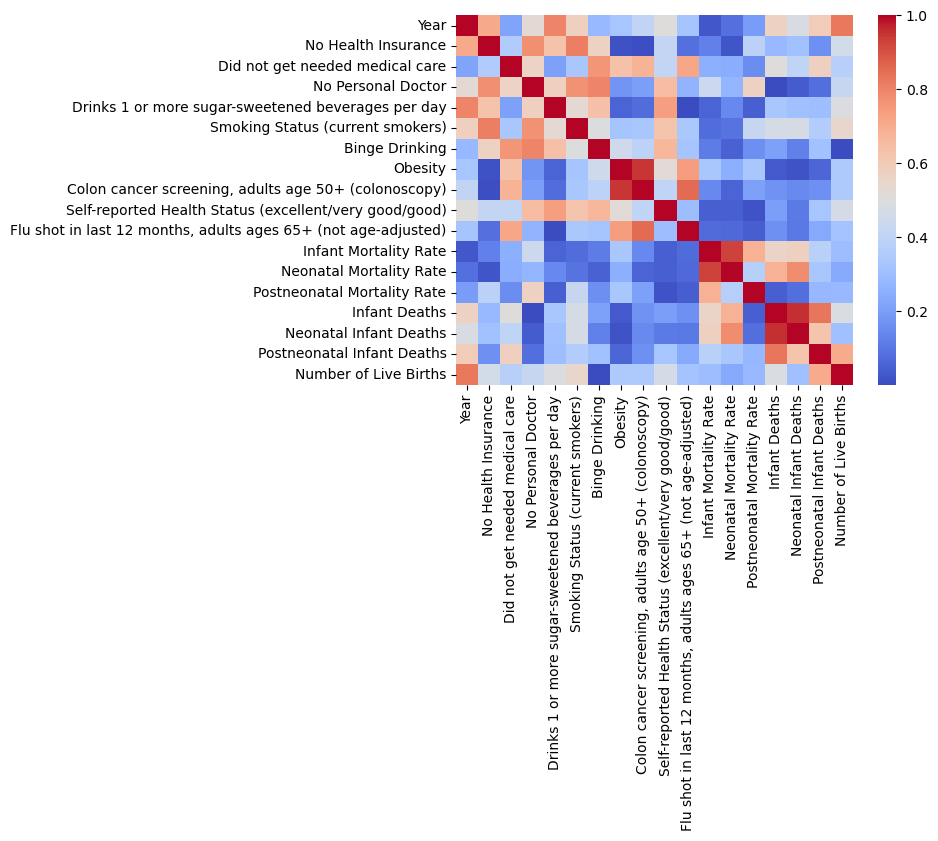

In [5]:
matrix_data_corr=df.corr(numeric_only=True).abs()
sns.heatmap(matrix_data_corr,annot=False,cmap='coolwarm')

In [6]:
# Main 3 features building model off of - Year -> Categorical Data
X = df[['Binge Drinking', 'Smoking Status (current smokers)', 'Postneonatal Mortality Rate']]
# Target: No personal doctor (Primary Care)
y = df['No Personal Doctor']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

from sklearn import linear_model

lr = linear_model.LinearRegression()
model=lr.fit(X_train, y_train)

print(model.intercept_,model.coef_)
y_predicted = model.predict(X_test)

from sklearn.metrics import r2_score
print("r2=",r2_score(y_test, y_predicted))

sgd = linear_model.TheilSenRegressor()
model = sgd.fit(X_train, y_train)

print(model.intercept_,model.coef_)
y_predicted_sgd = model.predict(X_test)


print("r2=", r2_score(y_test, y_predicted_sgd))


5.496911768316037 [ 0.69961991  0.30493721 -3.30905101]
r2= 0.8631488649880439
5.790549090625766 [ 0.72904075  0.31159123 -3.9745172 ]
r2= 0.7493346338563163


[Text(0.5, 1.0, 'Absolute Value of Correlation Between Features')]

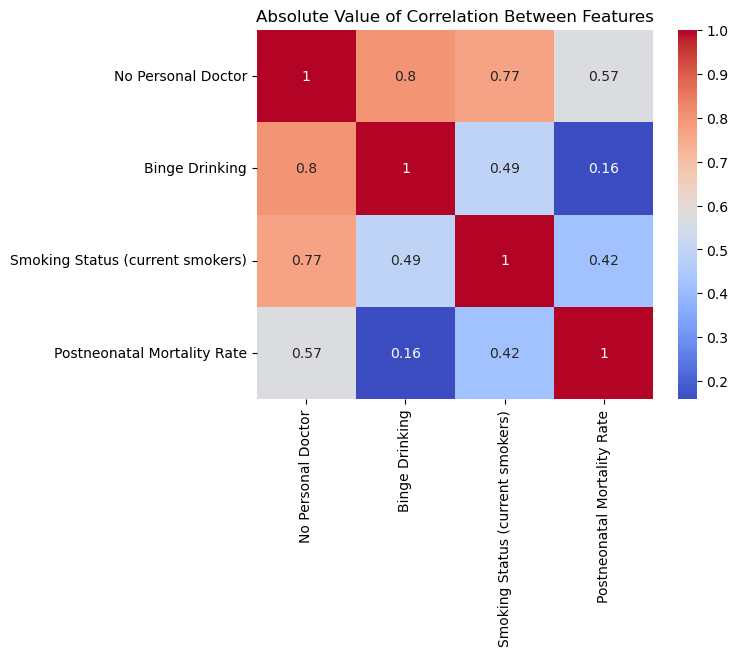

In [7]:
model_corr=df[['No Personal Doctor','Binge Drinking', 'Smoking Status (current smokers)', 'Postneonatal Mortality Rate'] ].corr(numeric_only=True).abs()
sns.heatmap(model_corr,annot=True,cmap='coolwarm').set(title = 'Absolute Value of Correlation Between Features')

People binge drink tend to not have a personal doctor
People who Smoke tend to not have a personal doctor
People who experience high postneonatal mortality rate tend to not have personal doctors

In [8]:
c = df.corr(numeric_only = True).abs()
s = c.unstack()
so = s.sort_values(kind="quicksort", ascending=False)
dftmp=pd.DataFrame(so.index, columns = ["A"])
a= so[0::1].tolist()
dfcoor = pd.DataFrame(dftmp['A'].tolist(), index=dftmp.index, columns = ["Param1","Param2"])
dfcoor["score"]=pd.DataFrame(a)
dfcoor.value_counts()

Param1                 Param2                                                          score   
Binge Drinking         Binge Drinking                                                  1.000000    1
Number of Live Births  Infant Deaths                                                   0.486274    1
Obesity                Infant Deaths                                                   0.035583    1
                       Flu shot in last 12 months, adults ages 65+ (not age-adjusted)  0.738493    1
                       Drinks 1 or more sugar-sweetened beverages per day              0.057921    1
                                                                                                  ..
Infant Deaths          Smoking Status (current smokers)                                0.472597    1
                       Self-reported Health Status (excellent/very good/good)          0.200385    1
                       Postneonatal Mortality Rate                                     0.046883 

In [9]:
dftmp = dfcoor[dfcoor.Param1.isin(df.columns)]
dftmp = dftmp[dftmp.Param2.isin(df2.columns)]
#dftmp = dftmp[~dftmp.Param2.isin(["Year"])]
#dftmp = dftmp[~dftmp.Param1.isin(["Year"])]
dftmp.sort_values(by = "score", ignore_index = True, ascending = False)[1:50]
dftmp[dftmp.Param1 == "No Personal Doctor"]

,Param1,Param2,score
89,No Personal Doctor,Postneonatal Mortality Rate,0.570693
97,No Personal Doctor,Year,0.531098
125,No Personal Doctor,Infant Mortality Rate,0.437199
126,No Personal Doctor,Number of Live Births,0.419978
206,No Personal Doctor,Neonatal Mortality Rate,0.271071
272,No Personal Doctor,Postneonatal Infant Deaths,0.080419
303,No Personal Doctor,Neonatal Infant Deaths,0.036055
319,No Personal Doctor,Infant Deaths,0.004357


In [10]:
dfcoor[dfcoor.Param1 == 'Self-reported Health Status (excellent/very good/good)'][(dfcoor.Param2 == 'Binge Drinking')|(dfcoor.Param2 == 'Smoking Status (current smokers)')]

/var/folders/wx/cngbp16952x30h4gskh91ymr0000gn/T/ipykernel_82090/1212019850.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfcoor[dfcoor.Param1 == 'Self-reported Health Status (excellent/very good/good)'][(dfcoor.Param2 == 'Binge Drinking')|(dfcoor.Param2 == 'Smoking Status (current smokers)')]


,Param1,Param2,score
60,Self-reported Health Status (excellent/very go...,Binge Drinking,0.670170
73,Self-reported Health Status (excellent/very go...,Smoking Status (current smokers),0.626752


In [11]:
dfcoor[dfcoor.Param1 == 'Postneonatal Mortality Rate'][(dfcoor.Param2 == 'Binge Drinking')|(dfcoor.Param2 == 'Smoking Status (current smokers)')]

/var/folders/wx/cngbp16952x30h4gskh91ymr0000gn/T/ipykernel_82090/3349932431.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfcoor[dfcoor.Param1 == 'Postneonatal Mortality Rate'][(dfcoor.Param2 == 'Binge Drinking')|(dfcoor.Param2 == 'Smoking Status (current smokers)')]


,Param1,Param2,score
129,Postneonatal Mortality Rate,Smoking Status (current smokers),0.419528
244,Postneonatal Mortality Rate,Binge Drinking,0.158746


In [12]:
dfcoor[dfcoor.Param1 == 'No Personal Doctor'][dfcoor.score > .5]

/var/folders/wx/cngbp16952x30h4gskh91ymr0000gn/T/ipykernel_82090/48581607.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfcoor[dfcoor.Param1 == 'No Personal Doctor'][dfcoor.score > .5]


,Param1,Param2,score
2,No Personal Doctor,No Personal Doctor,1.000000
35,No Personal Doctor,Binge Drinking,0.799628
38,No Personal Doctor,No Health Insurance,0.775932
41,No Personal Doctor,Smoking Status (current smokers),0.766921
63,No Personal Doctor,Self-reported Health Status (excellent/very go...,0.649331
81,No Personal Doctor,Drinks 1 or more sugar-sweetened beverages per...,0.578538
89,No Personal Doctor,Postneonatal Mortality Rate,0.570693
90,No Personal Doctor,Did not get needed medical care,0.564300
97,No Personal Doctor,Year,0.531098


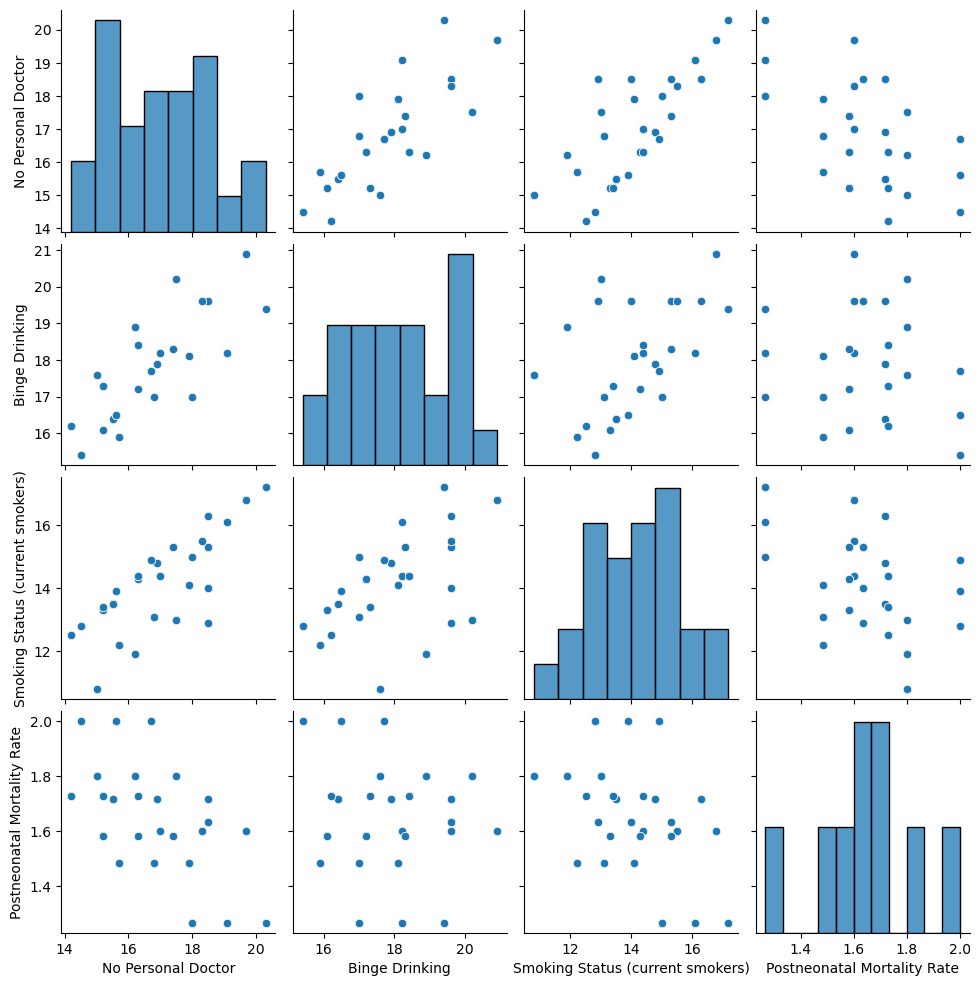

In [13]:
dftmp = df[["No Personal Doctor", "Binge Drinking", "Smoking Status (current smokers)", "Postneonatal Mortality Rate"]]
sns.pairplot(dftmp)

Text(0.5, 0, 'Year')

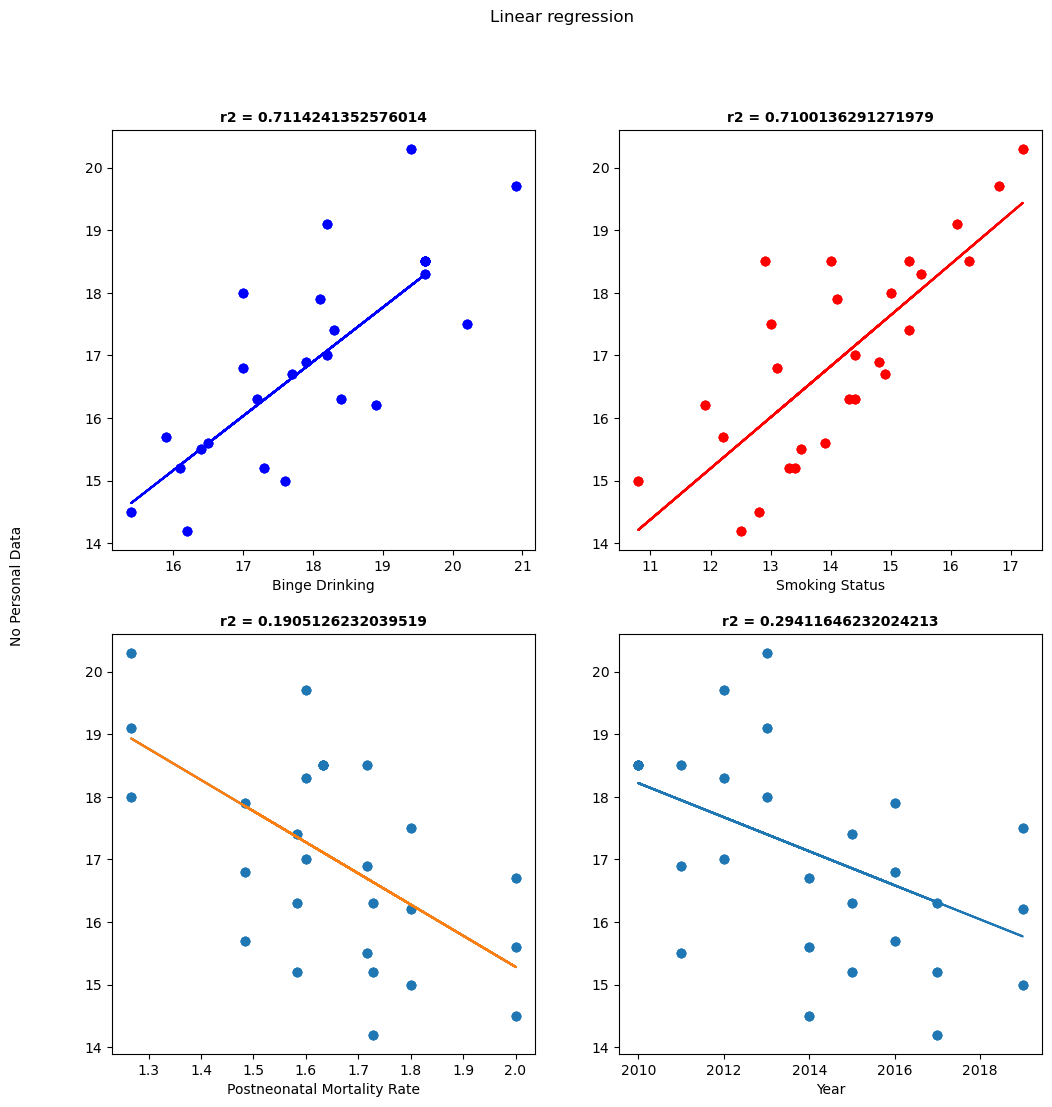

In [14]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize = (12,12))
fig.text(0.04, 0.5, 'No Personal Data', va='center', rotation='vertical')
fig.suptitle("Linear regression")
ax1.scatter( df["Binge Drinking"], df["No Personal Doctor"], c='b')
X_train, X_test, y_train, y_test = train_test_split(X, y)
X = df[['Binge Drinking','Smoking Status (current smokers)', 'Postneonatal Mortality Rate']]
y = df['No Personal Doctor']
X_train, X_test, y_train, y_test = train_test_split(X[['Binge Drinking']], y)
lr = linear_model.LinearRegression()
model=lr.fit(X_train, y_train)
y_predicted = model.predict(X_test)
ax1.plot(X_test,y_predicted, c= 'b')
r2 = 'r2 = '+ r2_score(y_test, y_predicted).astype(str)
ax1.set_title(r2, fontsize=10, fontweight='bold')
ax1.set_xlabel("Binge Drinking")
ax2.scatter( df["Smoking Status (current smokers)"], df["No Personal Doctor"], c = 'r')
X_train, X_test, y_train, y_test = train_test_split(X, y)
X = df[['Smoking Status (current smokers)','Smoking Status (current smokers)', 'Postneonatal Mortality Rate']]
y = df['No Personal Doctor']
X_train, X_test, y_train, y_test = train_test_split(X[['Smoking Status (current smokers)']], y)
lr = linear_model.LinearRegression()
model=lr.fit(X_train, y_train)
y_predicted = model.predict(X_test)
ax2.plot(X_test,y_predicted, color = 'r')
r2 = 'r2 = '+ r2_score(y_test, y_predicted).astype(str)
ax2.set_title(r2, fontsize=10, fontweight='bold')
ax2.set_xlabel("Smoking Status")
ax3.scatter( df["Postneonatal Mortality Rate"], df["No Personal Doctor"])
X_train, X_test, y_train, y_test = train_test_split(X, y)
X = df[['Postneonatal Mortality Rate','Smoking Status (current smokers)', 'Postneonatal Mortality Rate']]
y = df['No Personal Doctor']
X_train, X_test, y_train, y_test = train_test_split(X[['Postneonatal Mortality Rate']], y)
lr = linear_model.LinearRegression()
model=lr.fit(X_train, y_train)
y_predicted = model.predict(X_test)
ax3.plot(X_test,y_predicted)
r2 = 'r2 = '+ r2_score(y_test, y_predicted).astype(str)
ax3.set_title(r2, fontsize=10, fontweight='bold')
ax3.set_xlabel("Postneonatal Mortality Rate")
ax4.scatter( df["Year"], df["No Personal Doctor"])
X_train, X_test, y_train, y_test = train_test_split(X, y)
X = df[['Year','Smoking Status (current smokers)', 'Postneonatal Mortality Rate']]
y = df['No Personal Doctor']
X_train, X_test, y_train, y_test = train_test_split(X[['Year']], y)
lr = linear_model.LinearRegression()
model=lr.fit(X_train, y_train)
y_predicted = model.predict(X_test)
ax4.plot(X_test,y_predicted)
r2 = 'r2 = '+ r2_score(y_test, y_predicted).astype(str)
ax4.set_title(r2, fontsize=10, fontweight='bold')
ax4.set_xlabel("Year")

In [15]:
def sim(lrmodel, n = 500):
  r2cum = [0,0,0,0]
  for _ in range(n):
    r2cum[0] += model(lrmodel, ['Binge Drinking'])/n
    r2cum[1] += model(lrmodel, ['Smoking Status (current smokers)'])/n
    r2cum[2] += model(lrmodel, ['Postneonatal Mortality Rate'])/n
    r2cum[3] += model(lrmodel, ['Binge Drinking','Smoking Status (current smokers)', 'Postneonatal Mortality Rate'])/n
  return r2cum
def model(lrmodel, params, target = 'No Personal Doctor'):
    X = df[params]
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    lm = lrmodel
    model=lm.fit(X_train, y_train)
    y_predicted = model.predict(X_test)
    return r2_score(y_test, y_predicted)


In [16]:
print(sim(linear_model.LinearRegression()))
print(sim(linear_model.TheilSenRegressor()))

[0.5962319162745884, 0.5259006186067721, 0.2461024160993248, 0.8986475886186628]
[0.6124596952428546, 0.3362414604332683, 0.2133274780191597, 0.8632769079304792]


In [17]:
from sklearn.kernel_ridge import KernelRidge
print(sim(KernelRidge(), 100))

[0.5887388242912995, 0.35536127324292, -3.3215385531458277, 0.8689180278579045]


In [18]:
from sklearn.linear_model import Ridge
print(sim(linear_model.Ridge(), 100))

[0.5944757619856879, 0.5207890639049952, 0.22952056361116663, 0.886200646483995]


In [19]:
def model(lrmodel, params, target = 'No Personal Doctor'):
    X = df[params]
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    lm = lrmodel
    model=lm.fit(X_train, y_train)
    y_predicted = model.predict(X_test)
    print(model.intercept_,model.coef_)
model(linear_model.LinearRegression(),['Binge Drinking','Smoking Status (current smokers)', 'Postneonatal Mortality Rate'])

5.032411873993054 [ 0.65103594  0.34014455 -2.74031523]


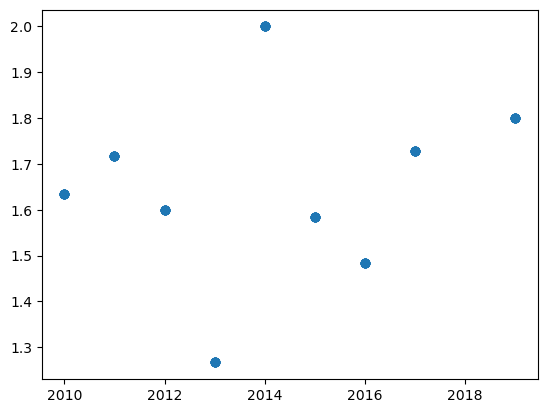

In [20]:
plt.scatter(df.Year, df['Postneonatal Mortality Rate'])

In [21]:
def model(lrmodel, params, target = 'No Personal Doctor'):
    X = df[params]
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    lm = lrmodel
    model=lm.fit(X_train, y_train)
    y_predicted = model.predict(X_test)
    print(model.dual_coef_,model.n_features_in_)
model(KernelRidge(),['Binge Drinking','Smoking Status (current smokers)', 'Postneonatal Mortality Rate'])

[ 0.87693625  0.43274354  0.43274354 -0.12324509 -0.83348088 -0.38260746
  0.47157019 -0.83348088 -0.58343011 -0.14496411  0.04894441  0.43274354
  0.66201293  0.61708048 -0.21525876 -0.58343011  0.79169412  0.00164161
  0.00164161 -0.47765165 -0.47983099 -0.28936123 -0.28936123 -0.28936123
  0.44629866 -0.83348088  0.61708048  0.87693625  0.00164161 -0.14496411
 -0.47983099  0.27217842 -0.64823874 -0.47983099 -0.33215912 -0.96316207
 -0.96316207 -0.33215912  0.47157019  0.27217842  0.92157309 -0.25292627
  0.86259078 -0.25292627  0.92157309  0.87693625 -0.19961418  0.27217842
  0.44629866 -0.38260746 -0.21525876  0.04894441 -0.25292627 -0.64823874
 -0.14496411  0.86259078  0.47157019 -0.58343011 -0.12324509  0.92157309] 3


In [22]:
print(df.Year.unique())

[2010 2011 2012 2013 2014 2015 2016 2017 2019]


In [23]:
from sklearn.cluster import KMeans

X = df[['Binge Drinking','Smoking Status (current smokers)', 'Postneonatal Mortality Rate']]
y = df['No Personal Doctor']
X_train, X_test, y_train, y_test = train_test_split(X, y)
lm = KMeans()
model=lm.fit(X_train, y_train)
y_predicted = model.predict(X_test)
#print(model.dual_coef_,model.n_features_in_)

/Users/danielxurbina/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 0, 'Year')

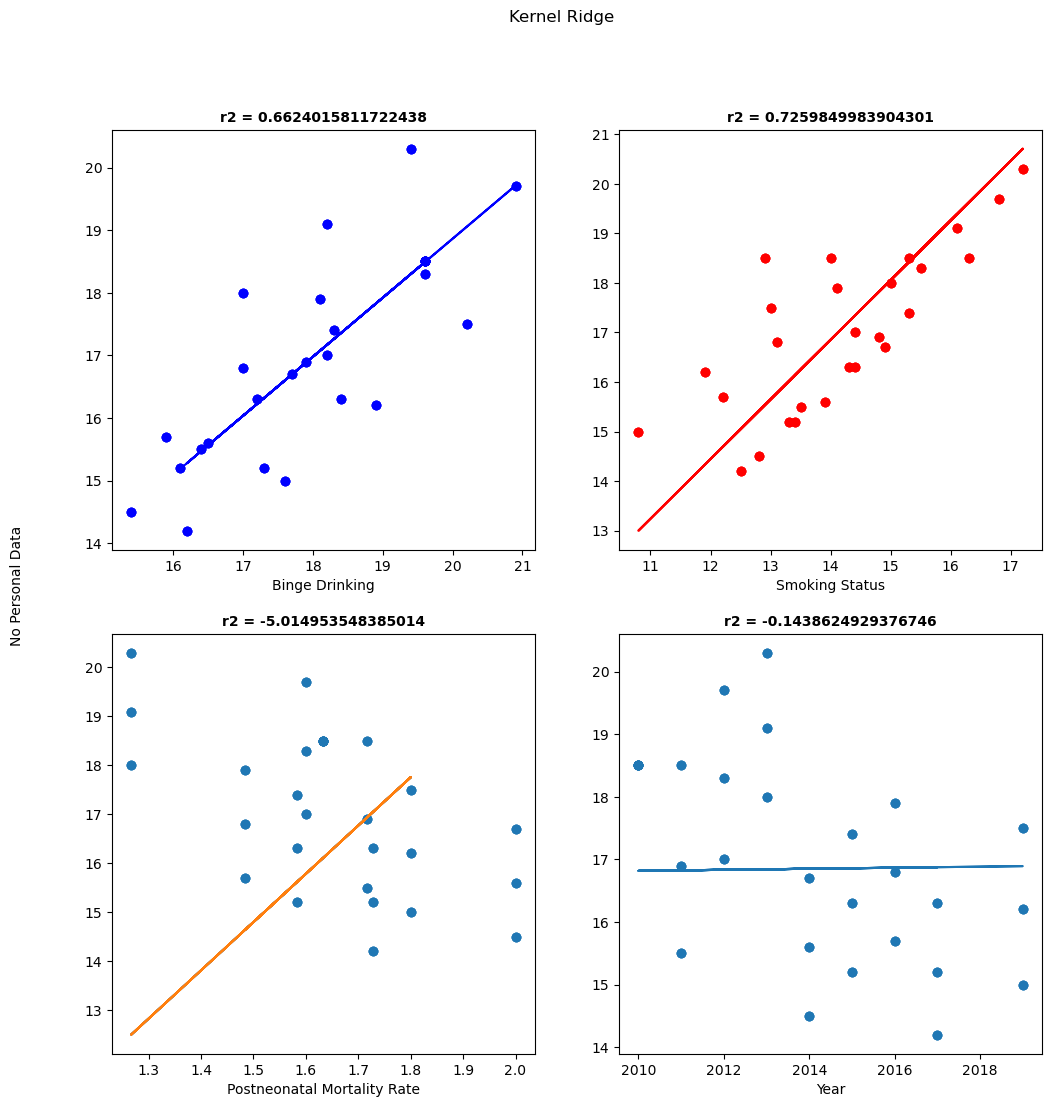

In [24]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize = (12,12))
fig.text(0.04, 0.5, 'No Personal Data', va='center', rotation='vertical')
fig.suptitle("Kernel Ridge")
ax1.scatter( df["Binge Drinking"], df["No Personal Doctor"], c='b')
X_train, X_test, y_train, y_test = train_test_split(X, y)
X = df[['Binge Drinking','Smoking Status (current smokers)', 'Postneonatal Mortality Rate']]
y = df['No Personal Doctor']
X_train, X_test, y_train, y_test = train_test_split(X[['Binge Drinking']], y)
lr = KernelRidge()
model=lr.fit(X_train, y_train)
y_predicted = model.predict(X_test)
ax1.plot(X_test,y_predicted, c= 'b')
r2 = 'r2 = '+ r2_score(y_test, y_predicted).astype(str)
ax1.set_title(r2, fontsize=10, fontweight='bold')
ax1.set_xlabel("Binge Drinking")
ax2.scatter( df["Smoking Status (current smokers)"], df["No Personal Doctor"], c = 'r')
X_train, X_test, y_train, y_test = train_test_split(X, y)
X = df[['Smoking Status (current smokers)','Smoking Status (current smokers)', 'Postneonatal Mortality Rate']]
y = df['No Personal Doctor']
X_train, X_test, y_train, y_test = train_test_split(X[['Smoking Status (current smokers)']], y)
lr = KernelRidge()
model=lr.fit(X_train, y_train)
y_predicted = model.predict(X_test)
ax2.plot(X_test,y_predicted, color = 'r')
r2 = 'r2 = '+ r2_score(y_test, y_predicted).astype(str)
ax2.set_title(r2, fontsize=10, fontweight='bold')
ax2.set_xlabel("Smoking Status")
ax3.scatter( df["Postneonatal Mortality Rate"], df["No Personal Doctor"])
X_train, X_test, y_train, y_test = train_test_split(X, y)
X = df[['Postneonatal Mortality Rate','Smoking Status (current smokers)', 'Postneonatal Mortality Rate']]
y = df['No Personal Doctor']
X_train, X_test, y_train, y_test = train_test_split(X[['Postneonatal Mortality Rate']], y)
lr = KernelRidge()
model=lr.fit(X_train, y_train)
y_predicted = model.predict(X_test)
ax3.plot(X_test,y_predicted)
r2 = 'r2 = '+ r2_score(y_test, y_predicted).astype(str)
ax3.set_title(r2, fontsize=10, fontweight='bold')
ax3.set_xlabel("Postneonatal Mortality Rate")
ax4.scatter( df["Year"], df["No Personal Doctor"])
X_train, X_test, y_train, y_test = train_test_split(X, y)
X = df[['Year','Smoking Status (current smokers)', 'Postneonatal Mortality Rate']]
y = df['No Personal Doctor']
X_train, X_test, y_train, y_test = train_test_split(X[['Year']], y)
lr = KernelRidge()
model=lr.fit(X_train, y_train)
y_predicted = model.predict(X_test)
ax4.plot(X_test,y_predicted)
r2 = 'r2 = '+ r2_score(y_test, y_predicted).astype(str)
ax4.set_title(r2, fontsize=10, fontweight='bold')
ax4.set_xlabel("Year")

Text(0.5, 0, 'Year')

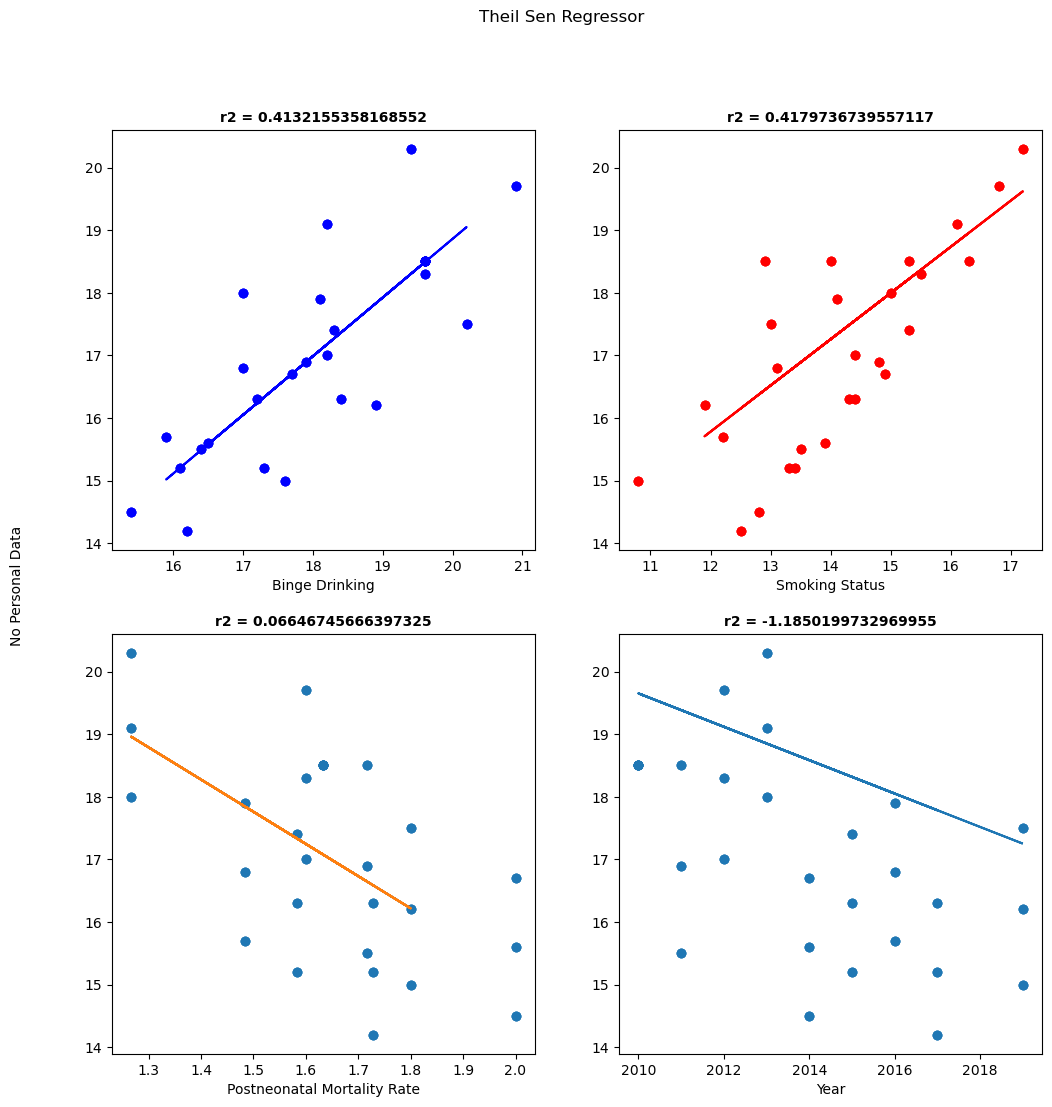

In [25]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize = (12,12))
fig.text(0.04, 0.5, 'No Personal Data', va='center', rotation='vertical')
fig.suptitle("Theil Sen Regressor")
ax1.scatter( df["Binge Drinking"], df["No Personal Doctor"], c='b')
X_train, X_test, y_train, y_test = train_test_split(X, y)
X = df[['Binge Drinking','Smoking Status (current smokers)', 'Postneonatal Mortality Rate']]
y = df['No Personal Doctor']
X_train, X_test, y_train, y_test = train_test_split(X[['Binge Drinking']], y)
lr = linear_model.TheilSenRegressor()
model=lr.fit(X_train, y_train)
y_predicted = model.predict(X_test)
ax1.plot(X_test,y_predicted, c= 'b')
r2 = 'r2 = '+ r2_score(y_test, y_predicted).astype(str)
ax1.set_title(r2, fontsize=10, fontweight='bold')
ax1.set_xlabel("Binge Drinking")
ax2.scatter( df["Smoking Status (current smokers)"], df["No Personal Doctor"], c = 'r')
X_train, X_test, y_train, y_test = train_test_split(X, y)
X = df[['Smoking Status (current smokers)','Smoking Status (current smokers)', 'Postneonatal Mortality Rate']]
y = df['No Personal Doctor']
X_train, X_test, y_train, y_test = train_test_split(X[['Smoking Status (current smokers)']], y)
lr = linear_model.TheilSenRegressor()
model=lr.fit(X_train, y_train)
y_predicted = model.predict(X_test)
ax2.plot(X_test,y_predicted, color = 'r')
r2 = 'r2 = '+ r2_score(y_test, y_predicted).astype(str)
ax2.set_title(r2, fontsize=10, fontweight='bold')
ax2.set_xlabel("Smoking Status")
ax3.scatter( df["Postneonatal Mortality Rate"], df["No Personal Doctor"])
X_train, X_test, y_train, y_test = train_test_split(X, y)
X = df[['Postneonatal Mortality Rate','Smoking Status (current smokers)', 'Postneonatal Mortality Rate']]
y = df['No Personal Doctor']
X_train, X_test, y_train, y_test = train_test_split(X[['Postneonatal Mortality Rate']], y)
lr = linear_model.TheilSenRegressor()
model=lr.fit(X_train, y_train)
y_predicted = model.predict(X_test)
ax3.plot(X_test,y_predicted)
r2 = 'r2 = '+ r2_score(y_test, y_predicted).astype(str)
ax3.set_title(r2, fontsize=10, fontweight='bold')
ax3.set_xlabel("Postneonatal Mortality Rate")
ax4.scatter( df["Year"], df["No Personal Doctor"])
X_train, X_test, y_train, y_test = train_test_split(X, y)
X = df[['Year','Smoking Status (current smokers)', 'Postneonatal Mortality Rate']]
y = df['No Personal Doctor']
X_train, X_test, y_train, y_test = train_test_split(X[['Year']], y)
lr = linear_model.TheilSenRegressor()
model=lr.fit(X_train, y_train)
y_predicted = model.predict(X_test)
ax4.plot(X_test,y_predicted)
r2 = 'r2 = '+ r2_score(y_test, y_predicted).astype(str)
ax4.set_title(r2, fontsize=10, fontweight='bold')
ax4.set_xlabel("Year")

r2 = 0.5443403587439584


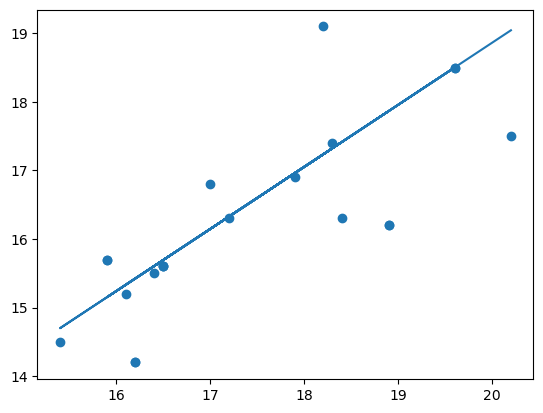

In [26]:
from sklearn.linear_model import LogisticRegression
def regress(p1, reg = linear_model.LinearRegression()):
  X = df[[p1]]
  y = df['No Personal Doctor']
  X_train, X_test, y_train, y_test = train_test_split(X, y)
  model = reg.fit(X_train, y_train)
  y_predicted = model.predict(X_test)
  print('r2 =', r2_score(y_test, y_predicted))
  return X_test, y_test, y_predicted
X_test, y_test, y_predicted = regress('Binge Drinking')
plt.scatter(X_test, y_test)
plt.plot(X_test, y_predicted)

1.0792167144951232 [0.88316783]
r2= 0.6438022607331895


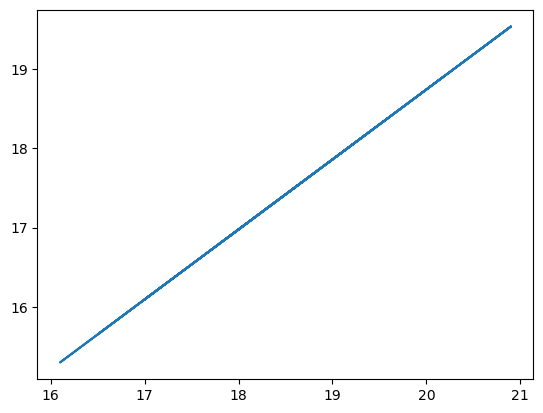

In [27]:
# Main 3 features building model off of - Year -> Categorical Data , 'Smoking Status (current smokers)', 'Postneonatal Mortality Rate'
X = df[['Binge Drinking']]
# Target: No personal doctor (Primary Care)
y = df['No Personal Doctor']
X_train, X_test, y_train, y_test = train_test_split(X, y)
lr = linear_model.LinearRegression()
model=lr.fit(X_train, y_train)

print(model.intercept_,model.coef_)
y_predicted = model.predict(X_test)

print("r2=",r2_score(y_test, y_predicted))
plt.plot(X_test, y_predicted)

# Explaining the Insights of Each Feature

In [30]:
def makeFeatureCharts(col, targetcol = "No Personal Doctor"):
  feature = df[col]
  target = df[targetcol]
  # Creating a figure with subplots for Binge Drinking histogram, boxplot, and scatterplot
  fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8,12))

  # Histogram to visualize Binge Drinking distribution
  ax1.hist(feature, bins= 10, color="steelblue", edgecolor="black")
  ax1.set_title("Distribution of " + col, fontsize=16, fontweight='bold')
  ax1.set_xlabel(col, fontsize=12)
  ax1.set_ylabel("Frequency", fontsize=12)
  ax1.grid(True, linestyle='--', alpha=0.5)

  # Box plot to analyze Binge Drinking
  boxplot_props = dict(facecolor='lightblue', linewidth=2)
  whisker_props = dict(color='black', linewidth=1.5)
  median_props = dict(color='red', linewidth=2)
  ax2.boxplot(feature, vert=False, patch_artist=True, boxprops=boxplot_props, whiskerprops=whisker_props, medianprops=median_props)
  ax2.set_title(col + " Box Plot", fontsize=16, fontweight='bold')
  ax2.set_xlabel(col + " Values", fontsize=12)
  ax2.grid(True, linestyle='--', alpha=0.5)

  # Scatter plot of Binge Drinking vs. No Personal Doctor
  sc = ax3.scatter(feature, target, alpha=0.7, s=80, marker='o',
                  #c=df['No Personal Doctor'], cmap='seismic'
                  )
  ax3.set_title(col + " vs. " + targetcol, fontsize=16, fontweight='bold')
  ax3.set_xlabel(col , fontsize=12)
  ax3.set_ylabel(targetcol , fontsize=12)
  ax3.grid(True, linestyle='--', alpha=0.5)

  # Adding a colorbar for the scatter plot
  # cbar = plt.colorbar(sc, ax=ax3)
  # cbar.set_label("No Personal Doctor")

  correlation = feature.corr(target)

  plt.subplots_adjust(hspace=0.4)
  plt.show()

  # Descriptive Statistics of Binge Drinking
  featurestats = feature.describe()
  print(featurestats)

  # Correlation between Binge Drinking and No Personal Doctor
  print("Correlation between", col, "and", targetcol, ":", correlation)

In [29]:
df.columns

Index(['Year', 'No Health Insurance', 'Did not get needed medical care',
       'No Personal Doctor',
       'Drinks 1 or more sugar-sweetened beverages per day',
       'Smoking Status (current smokers)', 'Binge Drinking', 'Obesity',
       'Colon cancer screening, adults age 50+ (colonoscopy)',
       'Self-reported Health Status (excellent/very good/good)',
       'Flu shot in last 12 months, adults ages 65+ (not age-adjusted)',
       'Infant Mortality Rate', 'Neonatal Mortality Rate',
       'Postneonatal Mortality Rate', 'Infant Deaths',
       'Neonatal Infant Deaths', 'Postneonatal Infant Deaths',
       'Number of Live Births'],
      dtype='object')

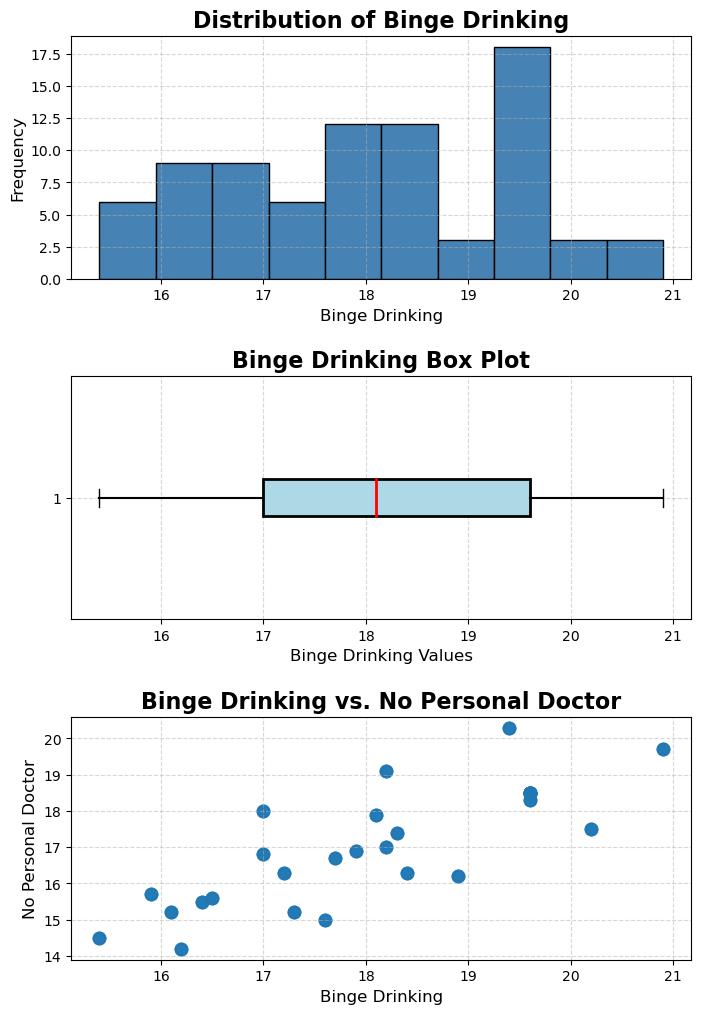

count    81.000000
mean     18.029630
std       1.440785
min      15.400000
25%      17.000000
50%      18.100000
75%      19.600000
max      20.900000
Name: Binge Drinking, dtype: float64
Correlation between Binge Drinking and No Personal Doctor : 0.7996278318522421


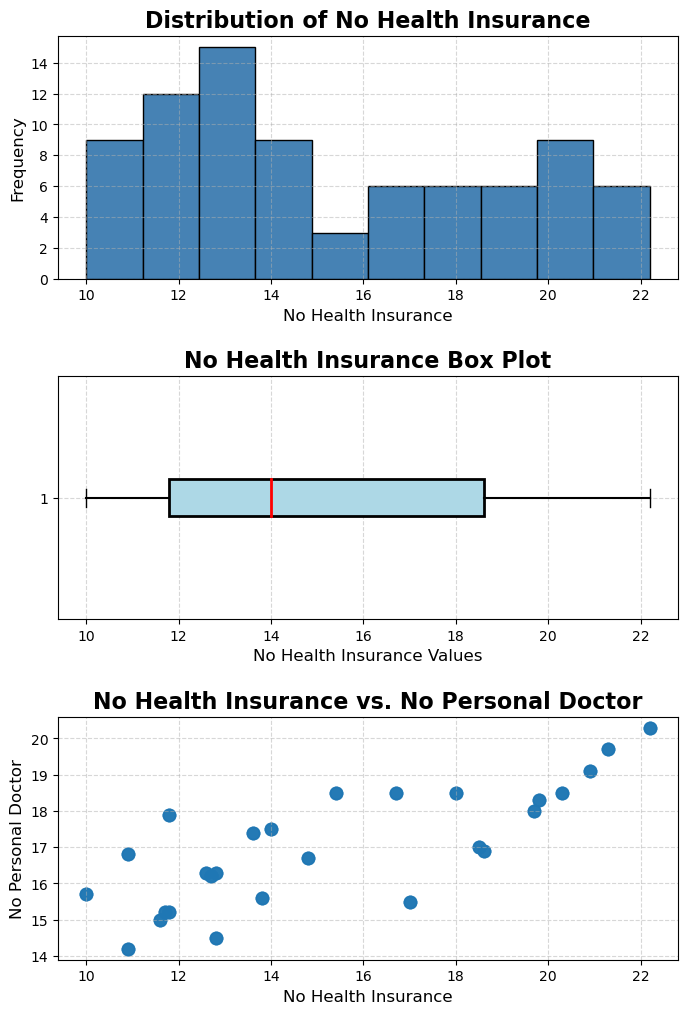

count    81.000000
mean     15.340741
std       3.696646
min      10.000000
25%      11.800000
50%      14.000000
75%      18.600000
max      22.200000
Name: No Health Insurance, dtype: float64
Correlation between No Health Insurance and No Personal Doctor : 0.7759320016435087


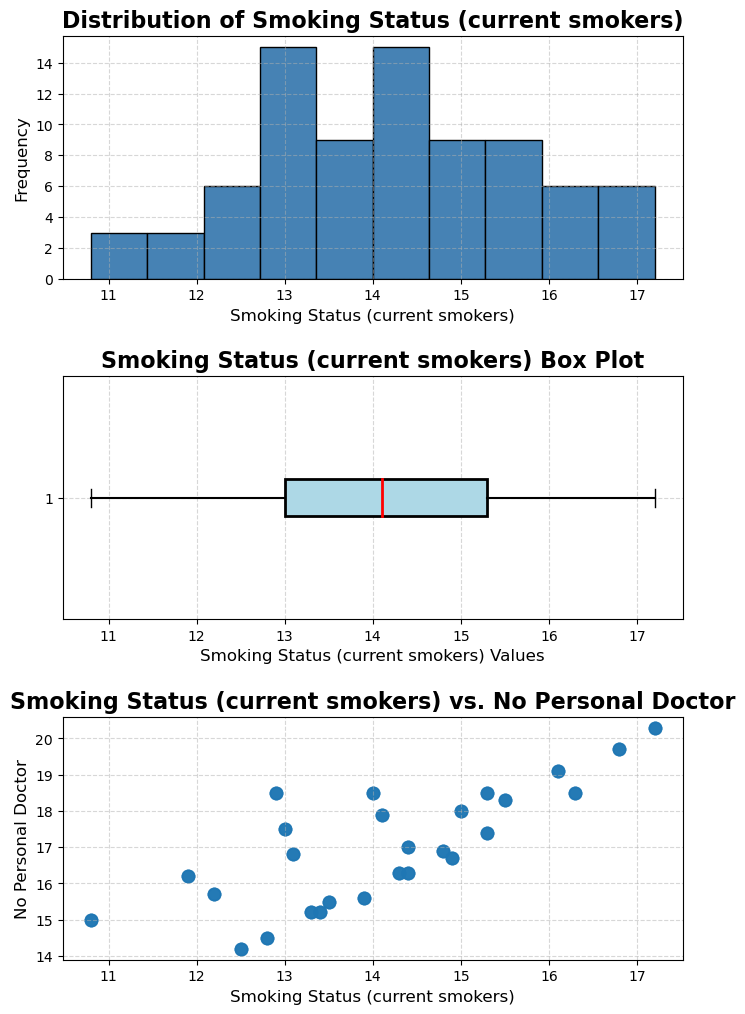

count    81.000000
mean     14.137037
std       1.518424
min      10.800000
25%      13.000000
50%      14.100000
75%      15.300000
max      17.200000
Name: Smoking Status (current smokers), dtype: float64
Correlation between Smoking Status (current smokers) and No Personal Doctor : 0.7669206969776775


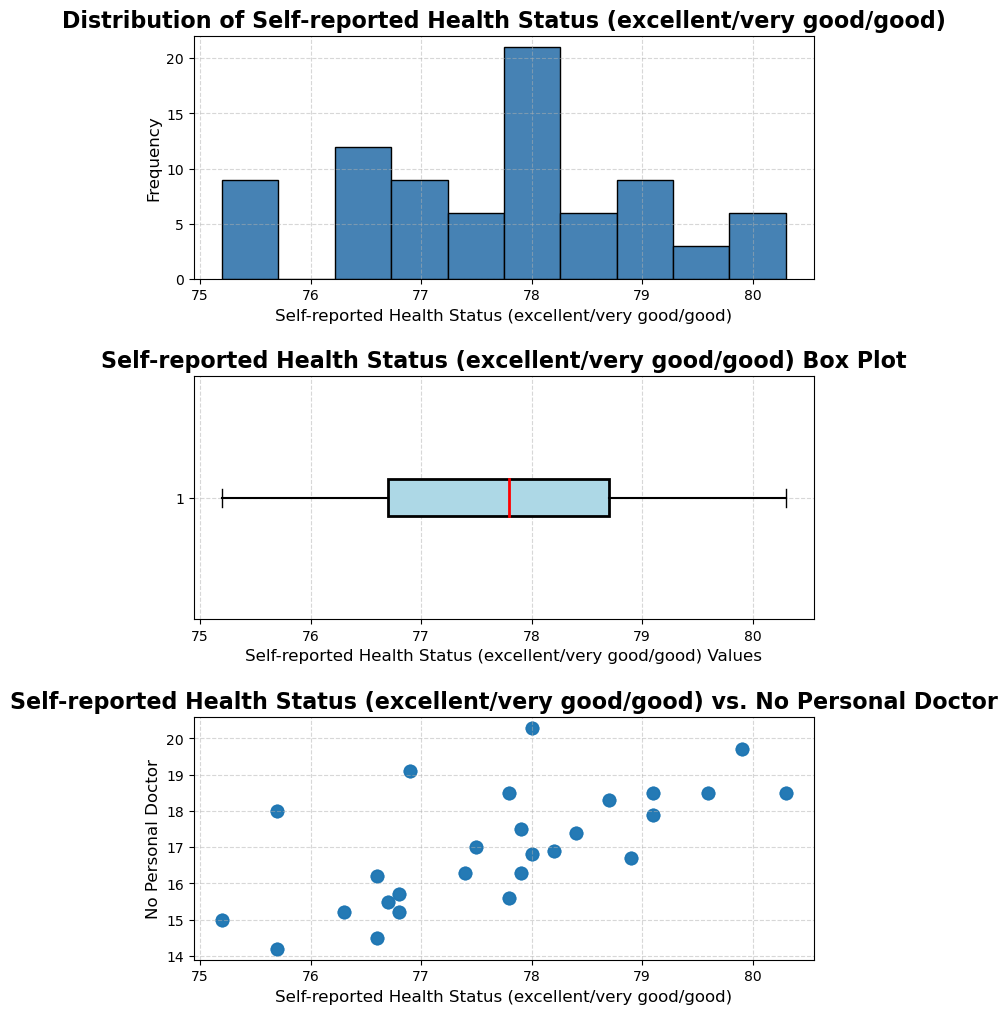

count    81.000000
mean     77.696296
std       1.293391
min      75.200000
25%      76.700000
50%      77.800000
75%      78.700000
max      80.300000
Name: Self-reported Health Status (excellent/very good/good), dtype: float64
Correlation between Self-reported Health Status (excellent/very good/good) and No Personal Doctor : 0.6493306586694105


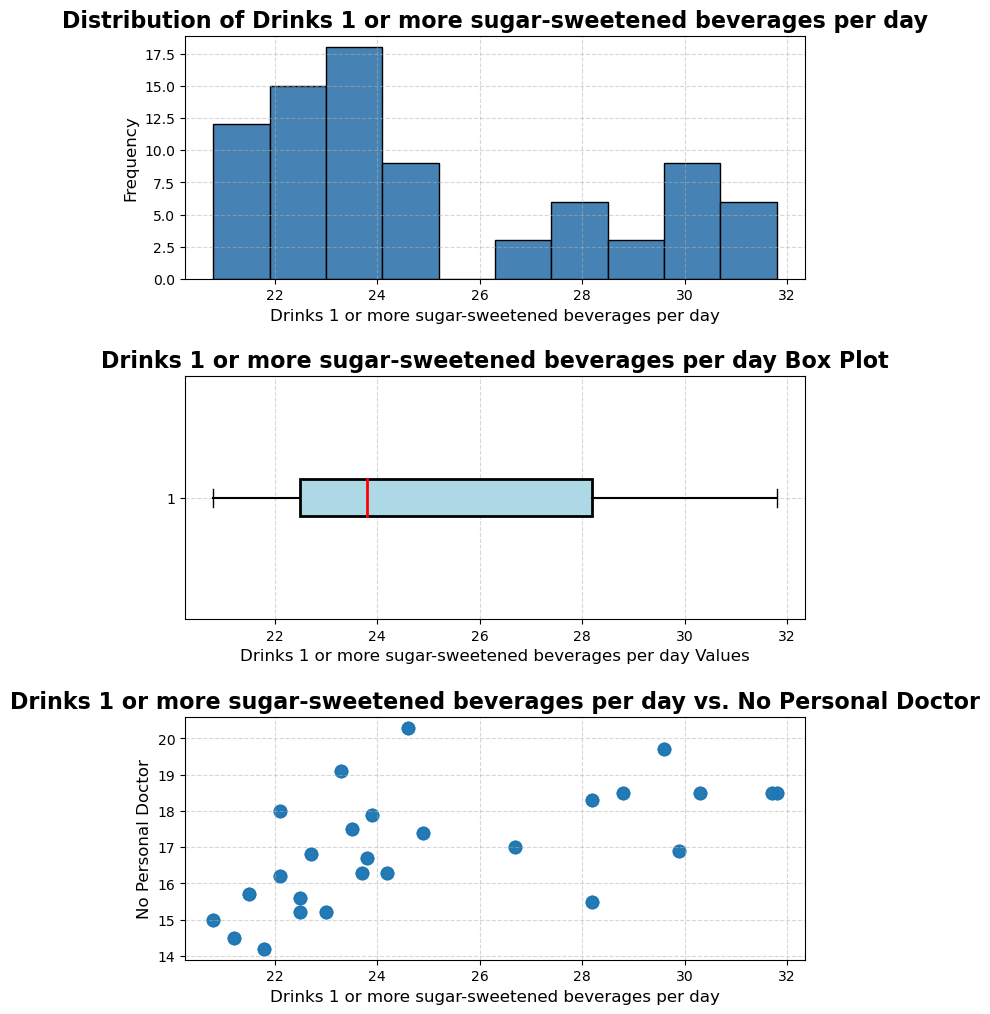

count    81.000000
mean     25.085185
std       3.384565
min      20.800000
25%      22.500000
50%      23.800000
75%      28.200000
max      31.800000
Name: Drinks 1 or more sugar-sweetened beverages per day, dtype: float64
Correlation between Drinks 1 or more sugar-sweetened beverages per day and No Personal Doctor : 0.5785377322572355


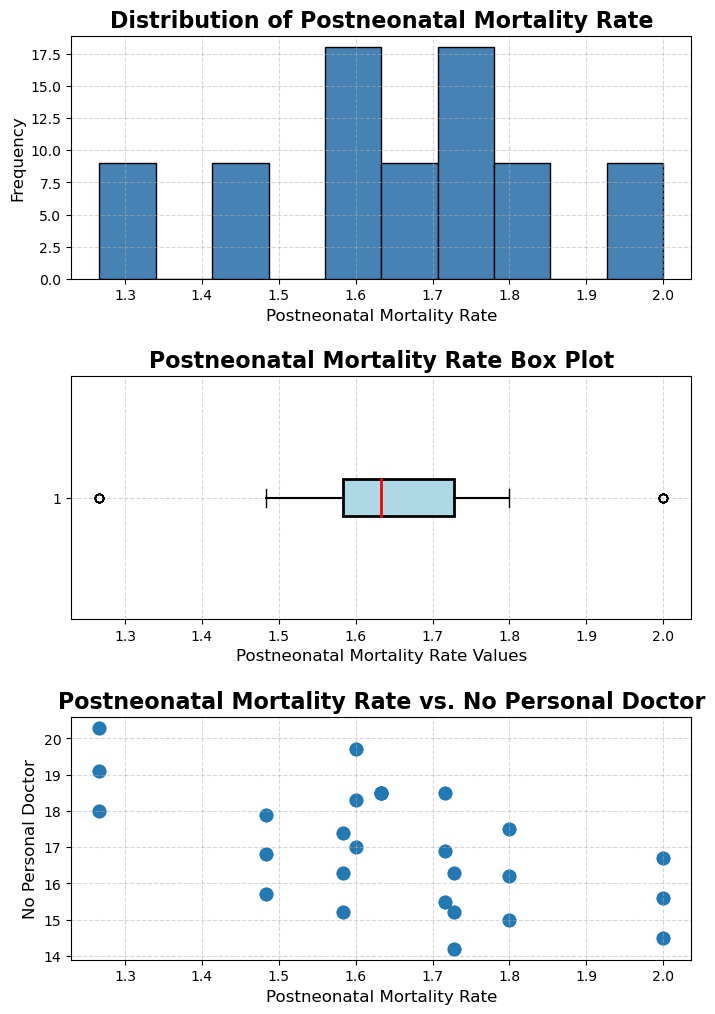

count    81.000000
mean      1.645767
std       0.194827
min       1.266667
25%       1.583333
50%       1.633333
75%       1.728571
max       2.000000
Name: Postneonatal Mortality Rate, dtype: float64
Correlation between Postneonatal Mortality Rate and No Personal Doctor : -0.5706931654899731


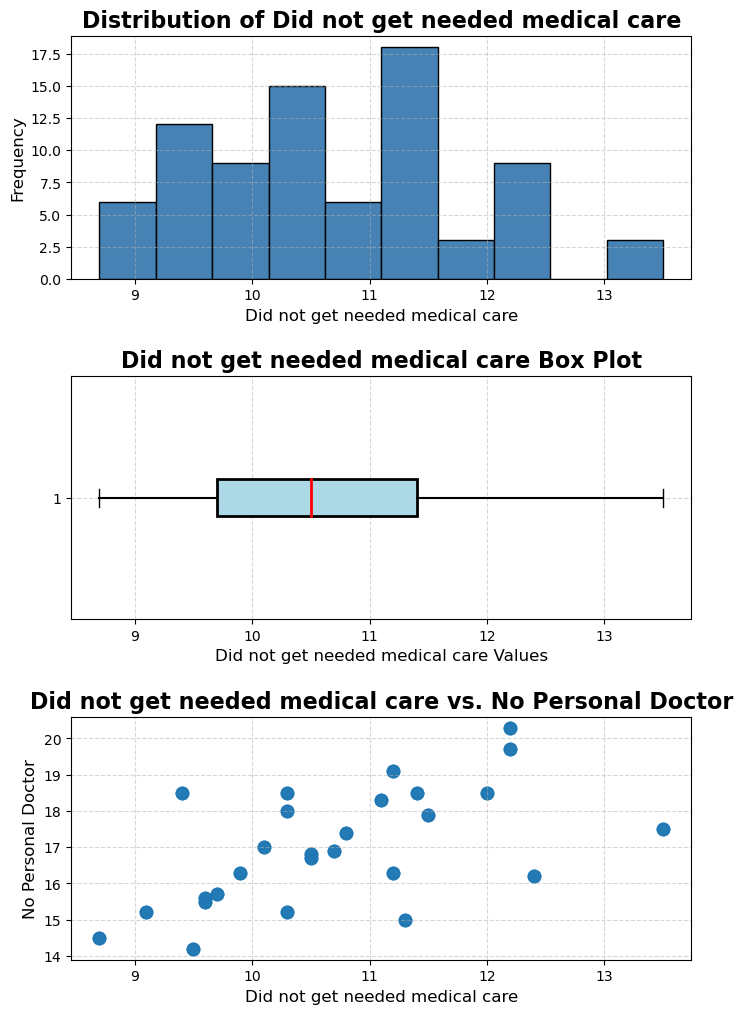

count    81.000000
mean     10.703704
std       1.124994
min       8.700000
25%       9.700000
50%      10.500000
75%      11.400000
max      13.500000
Name: Did not get needed medical care, dtype: float64
Correlation between Did not get needed medical care and No Personal Doctor : 0.5642995491307625


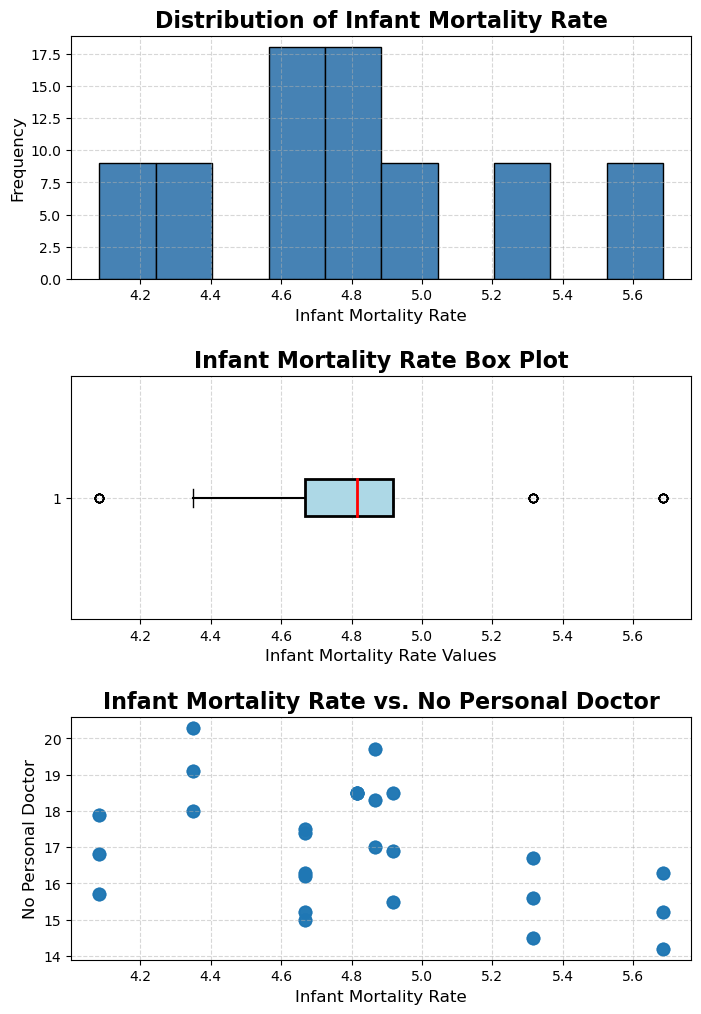

count    81.000000
mean      4.818783
std       0.452277
min       4.083333
25%       4.666667
50%       4.816667
75%       4.916667
max       5.685714
Name: Infant Mortality Rate, dtype: float64
Correlation between Infant Mortality Rate and No Personal Doctor : -0.4371989773565955


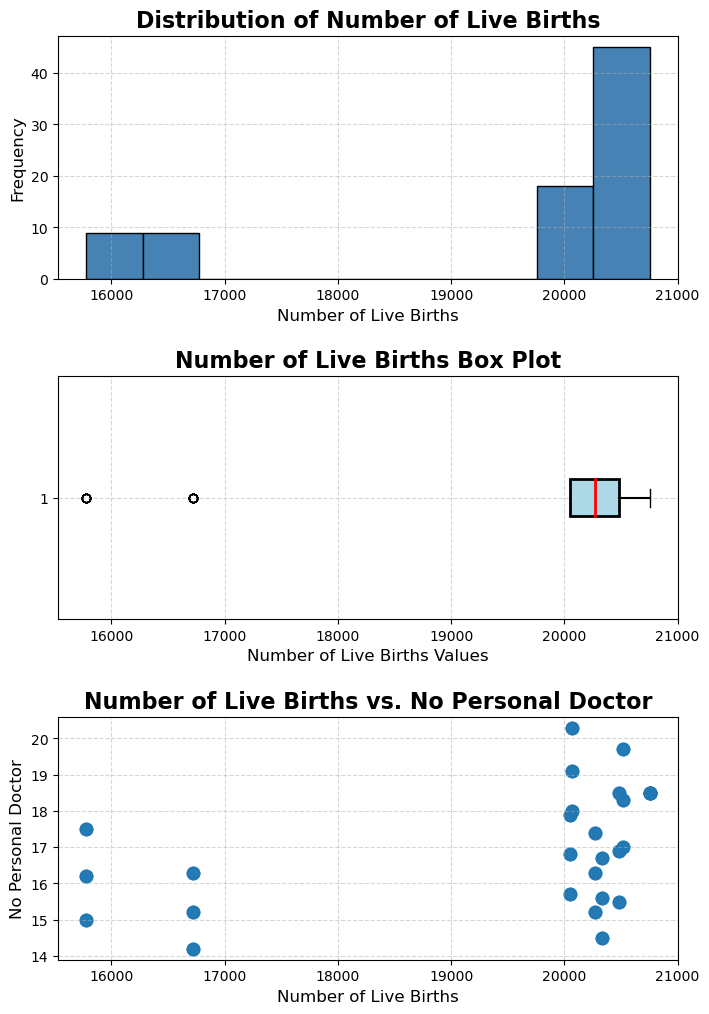

count       81.000000
mean     19439.563492
std       1744.303531
min      15777.428571
25%      20045.333333
50%      20265.666667
75%      20478.666667
max      20754.333333
Name: Number of Live Births, dtype: float64
Correlation between Number of Live Births and No Personal Doctor : 0.419978080229023


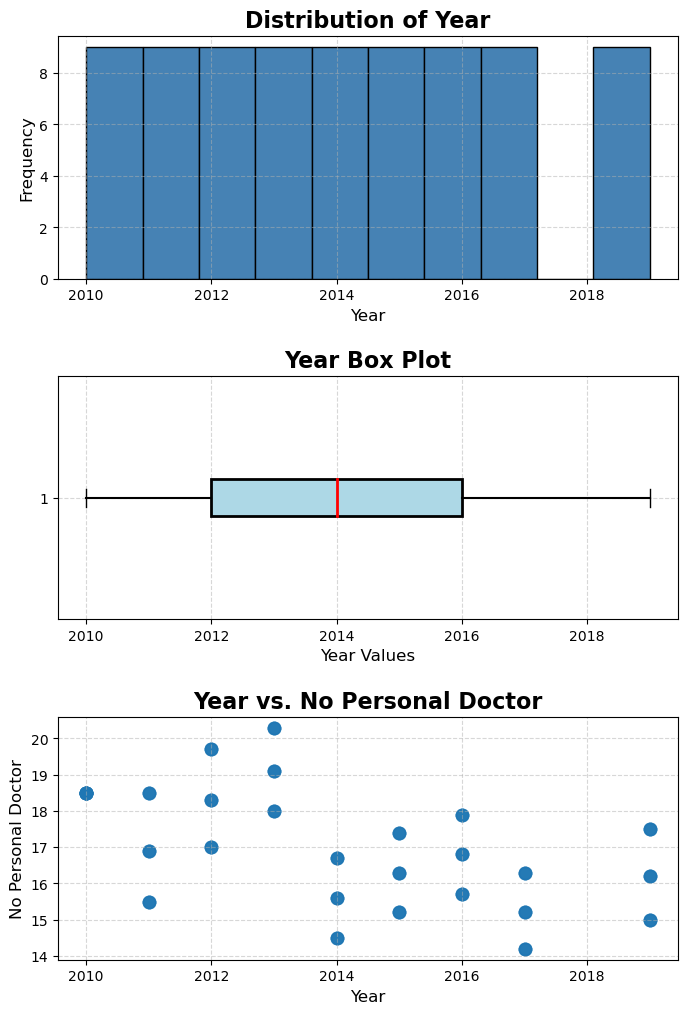

count      81.000000
mean     2014.111111
std         2.783882
min      2010.000000
25%      2012.000000
50%      2014.000000
75%      2016.000000
max      2019.000000
Name: Year, dtype: float64
Correlation between Year and No Personal Doctor : -0.5310984473795268


In [31]:
cols = ['Binge Drinking', 'No Health Insurance', 'Smoking Status (current smokers)', 'Self-reported Health Status (excellent/very good/good)',
        'Drinks 1 or more sugar-sweetened beverages per day', 'Postneonatal Mortality Rate', 'Did not get needed medical care',
        'Infant Mortality Rate', 'Number of Live Births', 'Year']
for col in cols:
  makeFeatureCharts(col)

Text(0.5, 0, 'Values')

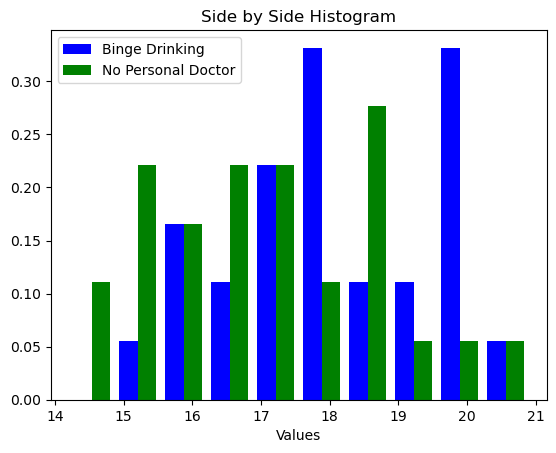

In [32]:
x1 = df['Binge Drinking']
x2 = df['No Personal Doctor']

colors = ['blue', 'green',]
names=['Binge Drinking', 'No Personal Doctor']

plt.hist([x1, x2], color=colors, label=names, density=True)

plt.legend()
plt.title("Side by Side Histogram")
plt.xlabel("Values")